In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
df_raw = pd.read_csv('data.csv')

for col in df_raw.columns:
    df_raw[col] = df_raw[col].str.lower()

print(f'Pre-processing dataframe shape {df_raw.shape}')
df_raw.head()

Pre-processing dataframe shape (3333, 11)


,Address,Area,Bedroom,Code,DateExpiration,DateUpLoad,Furniture,Legal,Name,Price,Toilet
0,quận 7,128 m²,3 phòng,38285881,01/12/2023,24/11/2023,full,NaN,"cho thuê căn hộ quận 7, view bitexco",16 triệu/tháng,2 phòng
1,quận 2,44 m²,1 phòng,37553900,04/12/2023,27/11/2023,đầy đủ,sổ đỏ/ sổ hồng,"400 căn 1pn 9tr - có nội thất 10,5tr, 2pn 11tr...",9 triệu/tháng,1 phòng
2,quận 2,51 m²,1 phòng,38096467,01/12/2023,24/11/2023,cơ bản,sổ đỏ/ sổ hồng,"333 căn - hàng đẹp giá tốt 1pn 9tr full nt 10,...",9 triệu/tháng,1 phòng
3,tân bình,77 m²,2 phòng,38387616,02/12/2023,25/11/2023,đầy đủ,NaN,"cho thuê ch cộng hòa garden, tân bình, 2pn, 77...",14 triệu/tháng,2 phòng
4,quận 2,75 m²,2 phòng,38639506,05/12/2023,25/11/2023,NaN,NaN,chủ cho thuê nhanh lumiere riverside giá tốt c...,22 triệu/tháng,2 phòng


In [3]:
df_raw = df_raw.drop(['Code', 'DateExpiration', 'DateUpLoad', 'Legal', 'Name'], axis=1)
df_clean_1 = df_raw.drop_duplicates(keep = False)

print(f'Dataframe shape after drop duplicates and unrelated variable \nis {df_clean_1.shape}')
df_clean_1.head()

Dataframe shape after drop duplicates and unrelated variable 
is (2090, 6)


,Address,Area,Bedroom,Furniture,Price,Toilet
2,quận 2,51 m²,1 phòng,cơ bản,9 triệu/tháng,1 phòng
6,tân bình,87 m²,2 phòng,NaN,10 triệu/tháng,2 phòng
9,quận 7,68 m²,2 phòng,cơ bản.,13 triệu/tháng,2 phòng
10,quận 7,115 m²,3 phòng,đầy đủ,17 triệu/tháng,2 phòng
20,quận 7,50 m²,1 phòng,NaN,6 triệu/tháng,1 phòng


In [4]:
count_nan = df_clean_1.isna().sum()
print(f'Number of NaN values:\n{count_nan}')

Number of NaN values:
Address        1
Area           5
Bedroom       75
Furniture    808
Price          4
Toilet       154
dtype: int64


In [5]:
#Label Furniture Type
df_clean_2 = df_clean_1.copy()
fur_type_0 = ['không', 'trống']
fur_type_2 = ['full', 'cao cấp', 'sang trọng', 'đủ', 'cấp cao', 'ntđđ']

for keyword in fur_type_0:
    df_clean_2.loc[df_clean_2['Furniture'].str.contains(keyword, na = True, regex = False), 'Furniture'] = 0 
for keyword in fur_type_2:
    df_clean_2.loc[df_clean_2['Furniture'].str.contains(keyword, na = False, regex = False), 'Furniture'] = 2
df_clean_2['Furniture'] = df_clean_2['Furniture'].apply(lambda keyword: 1 if isinstance(keyword, str) else keyword)

In [6]:
count_nan = df_clean_2.isna().sum()
print(f'Number of NaN values:\n{count_nan}')

Number of NaN values:
Address        1
Area           5
Bedroom       75
Furniture      0
Price          4
Toilet       154
dtype: int64


In [7]:
df_clean_3 = df_clean_2.dropna()
df_clean_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927 entries, 2 to 3308
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Address    1927 non-null   object
 1   Area       1927 non-null   object
 2   Bedroom    1927 non-null   object
 3   Furniture  1927 non-null   int64 
 4   Price      1927 non-null   object
 5   Toilet     1927 non-null   object
dtypes: int64(1), object(5)
memory usage: 105.4+ KB


In [8]:
df_clean_3.head()

,Address,Area,Bedroom,Furniture,Price,Toilet
2,quận 2,51 m²,1 phòng,1,9 triệu/tháng,1 phòng
6,tân bình,87 m²,2 phòng,0,10 triệu/tháng,2 phòng
9,quận 7,68 m²,2 phòng,1,13 triệu/tháng,2 phòng
10,quận 7,115 m²,3 phòng,2,17 triệu/tháng,2 phòng
20,quận 7,50 m²,1 phòng,0,6 triệu/tháng,1 phòng


In [9]:
def remove_units(df, col):
    col = df[f'{col}'].str.replace(r'[^\d,]', '', regex=True).str.replace(',', '.', regex=False)
    col.replace('', np.nan, inplace=True)
    return col

Area = remove_units(df_clean_3,'Area')
Bedroom = remove_units(df_clean_3,'Bedroom')
Price = remove_units(df_clean_3,'Price')
Toilet = remove_units(df_clean_3,'Toilet')

In [10]:
df_clean_4 = pd.DataFrame({
    'District': df_clean_3['Address'],
    'Area': Area.astype(float), 
    'Bedroom': Bedroom.astype(float),
    'Furniture': df_clean_3['Furniture'],
    'Price': Price.astype(float),
    'Toilet': Toilet.astype(float)
})

df_clean_4.head()

,District,Area,Bedroom,Furniture,Price,Toilet
2,quận 2,51.0,1.0,1,9.0,1.0
6,tân bình,87.0,2.0,0,10.0,2.0
9,quận 7,68.0,2.0,1,13.0,2.0
10,quận 7,115.0,3.0,2,17.0,2.0
20,quận 7,50.0,1.0,0,6.0,1.0


In [11]:
print('Mean Price: ', df_clean_4['Price'].mean())
print('Median Price: ', df_clean_4['Price'].median())
print('Highest Price: ', df_clean_4['Price'].max())
print('Lowest Price: ', df_clean_4['Price'].min())

df_clean_4.describe()

Mean Price:  14.028871983210912
Median Price:  12.0
Highest Price:  178.09
Lowest Price:  2.8


,Area,Bedroom,Furniture,Price,Toilet
count,1927.000000,1927.000000,1927.000000,1906.000000,1927.000000
mean,77.151977,2.046705,1.103269,14.028872,1.762844
std,31.228369,0.687296,0.921771,9.332225,0.534685
min,17.500000,1.000000,0.000000,2.800000,1.000000
25%,60.000000,2.000000,0.000000,8.500000,1.000000
50%,73.000000,2.000000,1.000000,12.000000,2.000000
75%,88.000000,2.000000,2.000000,16.500000,2.000000
max,337.000000,5.000000,2.000000,178.090000,5.000000


In [12]:
fig = px.histogram(
  df_clean_4,
  x = 'Price',
  marginal = 'box',
  title = 'Boxplot and Histogram of House Prices',
  width = 800,
  height = 600,
)

fig.show()

In [13]:
Q1 = df_clean_4['Price'].quantile(0.25)
Q3 = df_clean_4['Price'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.0
lower = Q1 - threshold * IQR
upper = Q3 + threshold * IQR

df_modified = df_clean_4[(df_clean_4['Price'] >= lower) & (df_clean_4['Price'] <= upper)]

In [14]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [15]:
fig = make_subplots(rows = 1, cols = 2)

trace0 = go.Box(
  x = df_clean_4['Price'],
  name = 'Before'
)
trace1 = go.Box(
  x = df_modified['Price'],
  name = 'After'
)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.show()

C:\Users\TUF\AppData\Local\Temp\ipykernel_14576\2143713892.py:2: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Bedroom'}>],
       [<AxesSubplot:title={'center':'Furniture'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Toilet'}>, <AxesSubplot:>]],
      dtype=object)

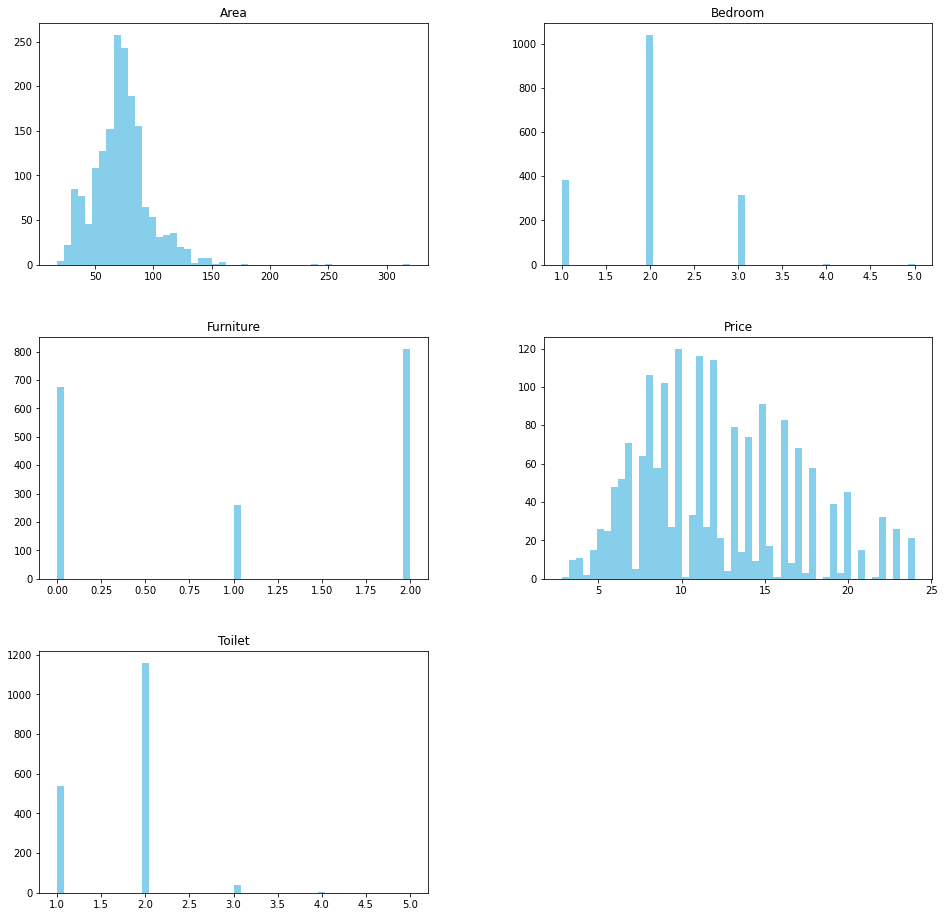

In [16]:
fig = plt.figure(figsize = (16,16))
df_modified.hist(ax=fig.gca(), bins = 50 ,color = 'skyblue', grid=False)

In [17]:
fig = make_subplots(rows = 1, cols = 3)

trace0 = go.Histogram(
  x = df_modified['Bedroom'],
  name = 'Bedroom',
)

trace1 = go.Histogram(
  x = df_modified['Toilet'],
  name = 'Toilet',
)

trace2 = go.Histogram(
  x = df_modified['Furniture'],
  name = 'Furniture',
)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)

fig.show()

In [18]:
fig = px.box(
  df_modified,
  x = 'District',
  y = 'Price',
  title = 'Boxplot District vs Price'      
)

fig.show()

In [19]:
fig = px.box(
  df_modified,
  x = 'District',
  y = 'Area',
  title = 'Boxplot District vs Area'      
)

fig.show()

In [20]:
df_modified.loc[:,'Price/Area'] = df_modified.loc[:,'Price']/df_modified.loc[:,'Area']

C:\Users\TUF\AppData\Local\Temp\ipykernel_14576\3066819006.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
# Label District
df_modified['District'] = df_modified['District'].replace(to_replace='tân bình', value='13')
df_modified['District'] = df_modified['District'].replace(to_replace='nhà bè', value='14')
df_modified['District'] = df_modified['District'].replace(to_replace='bình thạnh', value='15')
df_modified['District'] = df_modified['District'].replace(to_replace='bình chánh', value='16')
df_modified['District'] = df_modified['District'].replace(to_replace='phú nhuận', value='17')
df_modified['District'] = df_modified['District'].replace(to_replace='thủ đức', value='18')
df_modified['District'] = df_modified['District'].replace(to_replace='bình tân', value='19')
df_modified['District'] = df_modified['District'].replace(to_replace='gò vấp', value='20')
df_modified['District'] = df_modified['District'].replace(to_replace='hóc môn', value='21')
df_modified['District'] = df_modified['District'].replace(to_replace='tân phú', value='22')

df_modified['District'] = df_modified['District'].str.replace('quận ', '', regex=False)
df_modified['District'].replace('', np.nan, inplace=True)
df_modified['District'] = df_modified['District'].astype(float)

df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747 entries, 2 to 3308
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   District    1747 non-null   float64
 1   Area        1747 non-null   float64
 2   Bedroom     1747 non-null   float64
 3   Furniture   1747 non-null   int64  
 4   Price       1747 non-null   float64
 5   Toilet      1747 non-null   float64
 6   Price/Area  1747 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 109.2 KB


C:\Users\TUF\AppData\Local\Temp\ipykernel_14576\2265709367.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\TUF\AppData\Local\Temp\ipykernel_14576\2265709367.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\TUF\AppData\Local\Temp\ipykernel_14576\2265709367.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

In [23]:
y = df_modified['Price']

In [24]:
X1 = df_modified.drop(['Price'], axis= 1)

X1_train,X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 50)

In [25]:
model_1 = LinearRegression()
model_1.fit(X1_train, y_train)
y_pred = model_1.predict(X1_test)

In [26]:
print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

score_model_1 = metrics.r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score_model_1, 2) *100))

MAE: 1.0438320694818553
RMSE: 1.5187244723373756
The accuracy of our model is 90.0%


In [27]:
df_result_1 = pd.DataFrame()
df_result_1['Actual Price'] = pd.Series(y_test.reset_index(drop=True))
df_result_1['Predict Price 1'] = pd.Series(y_pred)

In [28]:
fig = make_subplots(rows = 1, cols = 2)

trace0 = go.Histogram(
  x = df_result_1['Actual Price'],
  name = 'Actual Price',
)

trace1 = go.Histogram(
  x = df_result_1['Predict Price 1'],
  name = 'Predict Price 1',
)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.show()

In [29]:
X2 = df_modified[['Area', 'Price/Area']]

X2_train,X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.25, random_state = 50)

In [30]:
model_2 = LinearRegression()
model_2.fit(X2_train, y_train)
y_pred = model_2.predict(X2_test)

In [31]:
print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

score_model_2 = metrics.r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score_model_2, 2) *100))

MAE: 1.0271994573318144
RMSE: 1.522991798611109
The accuracy of our model is 90.0%


In [32]:
df_result_2 = pd.DataFrame()
df_result_2['Actual Price'] = pd.Series(y_test.reset_index(drop=True))
df_result_2['Predict Price 2'] = pd.Series(model_2.predict(X2_test))

In [33]:
fig = make_subplots(rows = 1, cols = 2)

trace0 = go.Histogram(
  x = df_result_2['Actual Price'],
  name = 'Actual Price',
)

trace1 = go.Histogram(
  x = df_result_2['Predict Price 2'],
  name = 'Predict Price 2',
)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.show()

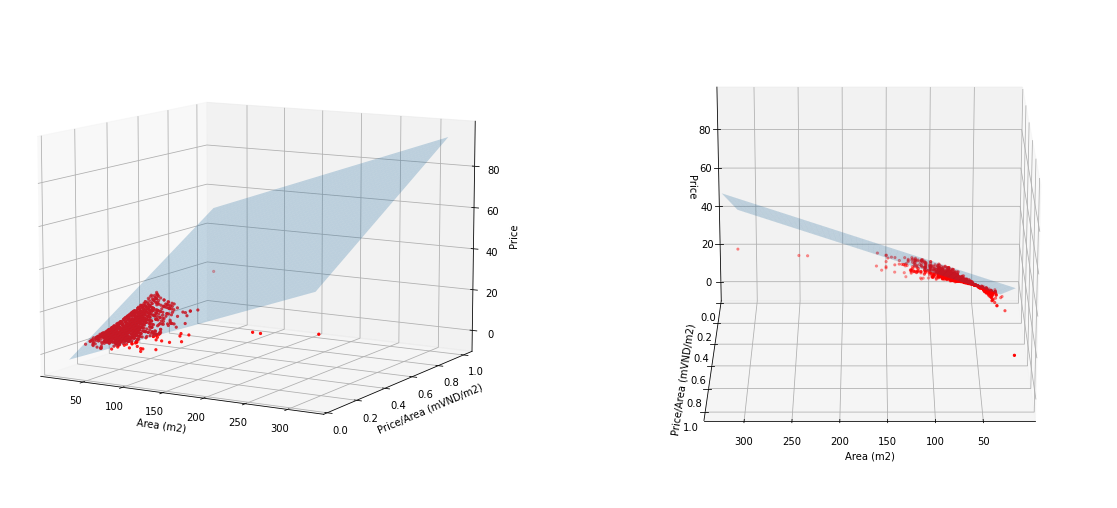

In [56]:
fig = plt.figure(figsize=(40,20))
ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(X2_train['Area'], X2_train['Price/Area'], y_train, marker='.', color='red')
ax1.set_xlabel("Area (m2)")
ax1.set_ylabel("Price/Area (mVND/m2)")
ax1.set_zlabel("Price")

coefs = model_2.coef_
intercept = model_2.intercept_
xs = np.linspace(X2_train['Area'].min(), X2_train['Area'].max(), 100)
ys = np.linspace(X2_train['Price/Area'].min(), X2_train['Price/Area'].max(), 100)
xs, ys = np.meshgrid(xs, ys)
zs = xs*coefs[0]+ys*coefs[1]+intercept

ax1.plot_surface(xs,ys,zs, alpha=0.25)
ax1.view_init(elev=20, azim=90)

ax2 = fig.add_subplot(221, projection='3d')
ax2.scatter(X2_train['Area'], X2_train['Price/Area'], y_train, marker='.', color='red')
ax2.set_xlabel("Area (m2)")
ax2.set_ylabel("Price/Area (mVND/m2)")
ax2.set_zlabel("Price")

coefs = model_2.coef_
intercept = model_2.intercept_
xs = np.linspace(X2_train['Area'].min(), X2_train['Area'].max(), 100)
ys = np.linspace(X2_train['Price/Area'].min(), X2_train['Price/Area'].max(), 100)
xs, ys = np.meshgrid(xs, ys)
zs = xs*coefs[0]+ys*coefs[1]+intercept

ax2.plot_surface(xs,ys,zs, alpha=0.25)
ax2.view_init(elev=10, azim=300)


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [36]:
X3 = df_modified.drop(['Price'], axis= 1)

X3_train,X3_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 50)

In [51]:
model_3 = RandomForestRegressor(
    n_estimators = 500,
    max_depth = 40,
    min_samples_split = 20,
    min_samples_leaf = 20,
    bootstrap = True
)

model_3.fit(X3_train,y_train)
y_pred = model_3.predict(X3_test)

In [52]:
print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

score_model_3 = metrics.r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score_model_3, 2) *100))

MAE: 0.6042031105700616
RMSE: 1.07153059345692
The accuracy of our model is 95.0%


In [53]:
df_result_3 = pd.DataFrame()
df_result_3['Actual Price'] = pd.Series(y_test.reset_index(drop=True))
df_result_3['Predict Price 3'] = pd.Series(model_3.predict(X3_test))

In [54]:
fig = make_subplots(rows = 1, cols = 2)

trace0 = go.Histogram(
  x = df_result_3['Actual Price'],
  name = 'Actual Price',
)

trace1 = go.Histogram(
  x = df_result_3['Predict Price 3'],
  name = 'Predict Price 3',
)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.show()